In [1]:
import cv2
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

In [2]:
import matplotlib.pyplot as plt

In [3]:
image=cv2.imread('bird.png')

array([[[ 82,  87,  96],
        [ 83,  88,  97],
        [ 85,  90,  99],
        ...,
        [ 36,  84,  58],
        [ 28,  91,  52],
        [ 30,  99,  56]],

       [[ 84,  89,  98],
        [ 85,  90,  99],
        [ 86,  91, 100],
        ...,
        [ 44,  90,  67],
        [ 34,  91,  58],
        [ 32,  98,  57]],

       [[ 84,  89,  98],
        [ 85,  90,  99],
        [ 87,  92, 101],
        ...,
        [ 59,  97,  79],
        [ 45,  94,  66],
        [ 37,  94,  61]],

       ...,

       [[ 10,  24,  22],
        [ 10,  24,  22],
        [ 10,  24,  22],
        ...,
        [168, 177, 191],
        [151, 159, 176],
        [142, 150, 167]],

       [[ 11,  24,  22],
        [ 11,  24,  22],
        [ 11,  24,  22],
        ...,
        [167, 174, 191],
        [159, 167, 184],
        [165, 173, 190]],

       [[ 11,  24,  22],
        [ 11,  24,  22],
        [ 11,  24,  22],
        ...,
        [155, 162, 179],
        [146, 154, 171],
        [157, 165, 182]]], dtype=uint8)
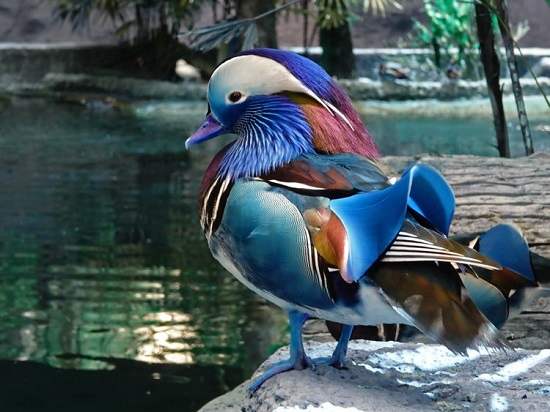

In [4]:
image.shape
image

In [5]:
X=image.reshape(-1,3)

In [6]:
X.shape

(226600, 3)

In [7]:
sum_of_squared_distances= []
K=range(1,10)
for k in K:
  km= KMeans(n_clusters=k, n_init=8)
  km=km.fit(X)
  sum_of_squared_distances.append(km.inertia_)

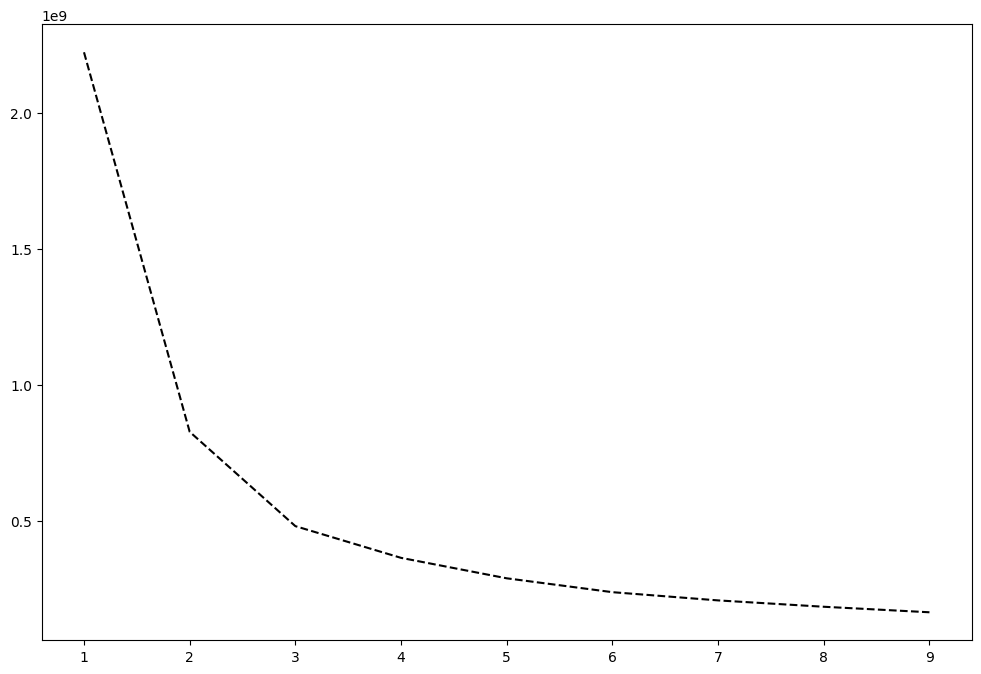

In [8]:
figure=plt.figure(figsize=(12,8))
plt.plot(K, sum_of_squared_distances, 'k--')

Iteratations over different values of k from 1 to 10.
For each value of k, a KMeans instance is created with the specified number of clusters and is fitted to the data.
We then compute and store the within-cluster sum of squares (WCSS), which is accessible via the inertia_ attribute of the KMeans object. Finally, we plot the elbow curve using Matplotlib, where the x-axis represents the number of clusters (k) and the y-axis represents the WCSS. The "elbow point" in the plot indicates the optimal value of k. The optimal k value from the above is found out to be 3.

In [9]:
kmeans=KMeans(n_clusters=3, n_init=8)

In [10]:
kmeans.fit(X)

KMeans(n_clusters=3, n_init=8)

In [11]:
segmented_img = kmeans.cluster_centers_[kmeans.labels_]

In [12]:
segmented_img=segmented_img.reshape(image.shape)

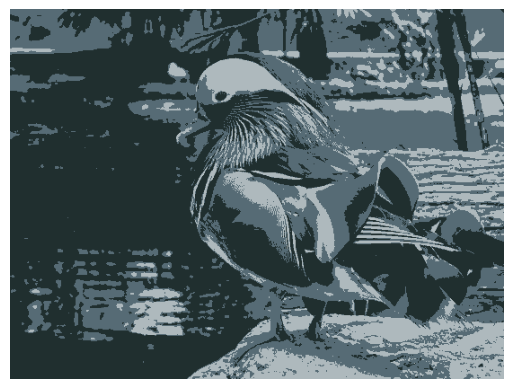

In [13]:
plt.imshow(segmented_img/255)
plt.axis('off')
plt.show()

The image after clustering it into 3 clusters.